## PODSTAWY RADIOTELEKOMUNIKACJI

### Ray Launcher w moim pokoju


##### Ewa Koper


## 1. Wstępne założenia projektowe

Początek naszych rozważań oparto na prostym modelu pokoju o kształcie prostokąta o bokach 
a i b, gdzie a nie jest mniejsze niż 12m. 

Boki pokoju spełniają zasadę złotego podziału, tj. zależność:

$$\frac{a+b}{a}=\frac{a}{b}$$

Na potrzeby naszego projektu przyjęto, że wartość a jest równa 13m, b natomiast 8 m. Na środku krótszej ściany pokoju zamontowano punkt dostępowy transmitujący dla częstotliwości 5 GHz. Zarówno dla anten nadawczej, jak i odbiorczej przyjęto dookólny rodzaj charakterystyki. Zysk energetyczny anten w skali liniowej został przyjęty jako 1 zarówno w kącie azymutu, jak i elewacji.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math
from copy import deepcopy
default_figsize=(9, 6)

## 2. Obliczenia

### 2.1. Transmisja jednodrogowa

Dla sytuacji nieruchomego nadajnika oraz odbiornika poruszającego się w osi pokoju równolegle do dłuższej ściany przeanalizowano zjawisko tłumienia ścieżki.

In [43]:
#rozmiary pokoju
a =  13 
b = 8
d = 1  #odleglosc od anteny, d_min = 1 m
f =  5 * 10**9
c = 299792458
lbd = c/f
#zyski energetyczne
Gr = 1
Gt = 1

Aby obliczyć tłumienie ścieżki w wolnej przestrzeni w funkcji odległości od nadajnika posłużymy się modelem Friisa:
    
$$
\frac{P_R}{P_T}=G_R \cdot G_T \cdot\left(\frac{\lambda}{4 \pi d}\right)^2
$$

Gdzie:
$P_T$ - moc nadawana,
$P_R$ - moc odebrana,
$G_R, G_T$-zysk energetyczny odbiornika, nadajnika,
$d$-odległość nadajnik-odbiornik.

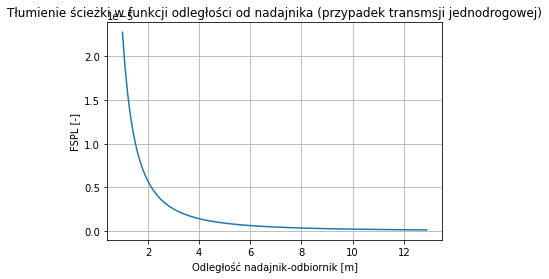

In [44]:
#3.1. Transmisja jednodrogowa
step = 0.1
dTemp = np.arange(d, a, step)
PL_linear = Gr * Gt * (lbd/(4*math.pi*dTemp))**2
fig = plt.figure(1)
plt.plot(dTemp, PL_linear)
plt.title('Tłumienie ścieżki w funkcji odległości od nadajnika (przypadek transmsji jednodrogowej)')
plt.xlabel('Odległość nadajnik-odbiornik [m]')
plt.ylabel('FSPL [-]')
plt.grid()
plt.show()

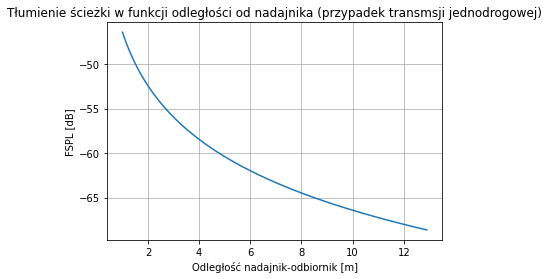

In [45]:
PL_log = 10 * np.log10(PL_linear)
fig = plt.figure(2)
plt.plot(dTemp, PL_log)
plt.title('Tłumienie ścieżki w funkcji odległości od nadajnika (przypadek transmsji jednodrogowej)')
plt.xlabel('Odległość nadajnik-odbiornik [m]')
plt.ylabel('FSPL [dB]')
plt.grid()
plt.show()

Analizując uzyskane wyniki (wykres 1 oraz 2) stwierdzić można, że FSPL (Free Space Path Loss) spada z kwadratem odległości nadajnik-odbiornik.

### 3.2. Transmisja wielodrogowa


**1D – Odbicie od przeciwległej ściany**

Aby możliwe było dokonanie obliczeń biorąc pod uwagę ścieżkę odbitą od ściany posłużymy się rekomendacją ITU-R P.2040-2 Effects of building materials and structures on radiowave propagation above about 100 MHz.


Obliczając względny spadek mocy sygnału skorzystamy z następującego wzoru:

$$
\frac{P_R}{P_0}=\left|\sum_{i=1}^L \frac{a_i}{d_i} e^{j \varphi_i}\right|^2
$$

$P_0-$ moc nadawana,
$P_R-$ moc odebrana,
$i$ - indeks ścieżki,
$a_i$ - współczynnik odbicia i-tej drogi sygnału,
$d_i$-dhugość i-tej drogi sygnału,
$\varphi_i-$ faza i-tej drogi sygnału $\left(\varphi_i=-2 \pi f_c \frac{d_i}{c}\right)_2$,
$L -$ liczba ścieżek.


Aby obliczyć współczynnik odbicia skorzystano ze wzoru:

$$
R_{e T M}=\frac{\eta \cos \theta-\sqrt{\eta-\sin ^2 \theta}}{\eta \cos \theta+\sqrt{\eta-\sin ^2 \theta}}
$$

$\eta$-względna przenikalność elektryczna ( $\eta_{\text {brick }}=3,91$ (źródło: ITU - R P. 2040-2, tab. 3)),
$\theta$ - kąt padania ścieżki.

Współczynnik odbicia od ściany ceglanej wynosi 0.3282666712518771


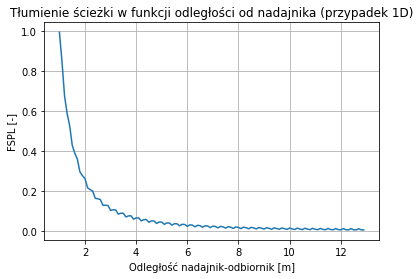

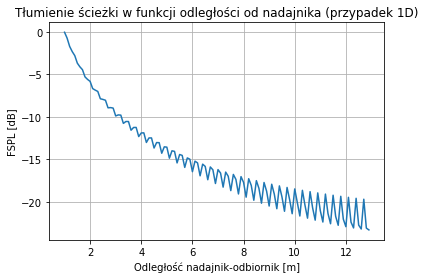

In [46]:
#3.2. Transmisja wielodrogowa
n = 3.91 #przenikalnosc elektr. dla cegly
theta = 0 #kat padania wiazki
a1 = 1
a2 = (n*math.cos(theta)-math.sqrt(n-math.sin(theta)**2))/(n*math.cos(theta)+math.sqrt(n-math.sin(theta)**2))
print('Współczynnik odbicia od ściany ceglanej wynosi ' + str(a2))
i=0
RPL_linear =  deepcopy(dTemp)
for d in dTemp:
    d2 = 2*a-d #sciezka 2 - odbicie od sciany
    fi1 = -2*math.pi*f*d/c
    fi2 = -2*math.pi*f*d2/c
    RPL_linear[i] = abs(a1/d *math.e**(fi1*1j) + a2/d2 *math.e**(fi2*1j))**2
    i  += 1
    
RPL_log = 10 * np.log10(RPL_linear)
    
fig = plt.figure(3)
plt.plot(dTemp, RPL_linear)
plt.title('Tłumienie ścieżki w funkcji odległości od nadajnika (przypadek 1D)')
plt.xlabel('Odległość nadajnik-odbiornik [m]')
plt.ylabel('FSPL [-]')
plt.grid()
plt.show()

fig = plt.figure(4)
plt.plot(dTemp, RPL_log)
plt.title('Tłumienie ścieżki w funkcji odległości od nadajnika (przypadek 1D)')
plt.xlabel('Odległość nadajnik-odbiornik [m]')
plt.ylabel('FSPL [dB]')
plt.grid()
plt.show()

Na uzyskanych wykresach można zaobserwować zafalowania spowodowane interferencją fali.

**2D – Odbicie od przeciwległej ściany i bocznych ścian**

Analizę tłumienia ścieżki rozszerzono o dodatkowe drogi propagacji sygnału uwzględniając odbicia od ścian bocznych pokoju zgdnie z przedstawionym poniżej rysunkiem poglądowym dla jednej z odbitych ścieżek.

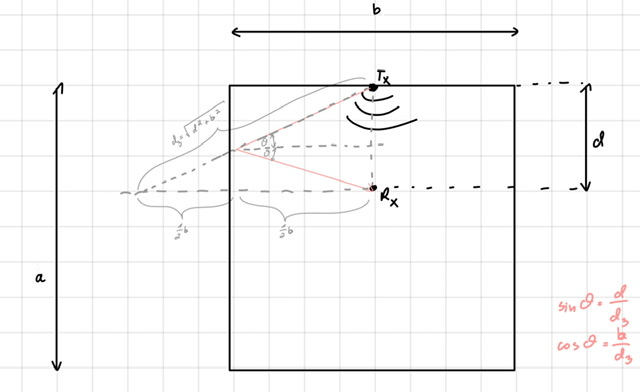


Na podstawie wykreślonej geometrii ścieżki wynika, że:
$$sin \theta = \frac{d}{d_3}$$
$$cos \theta = \frac{b}{d_3}$$
przy założeniu, że:
$$d_3 = \sqrt{d^2 + b^2}$$

Obie ściany boczne wykonane są z tego samego matetriału, a odbicie ścieżki następuje w sposób analogiczny. Względny spadek mocy zostanie wyznaczony na podstawie:

$$ \frac{P_R}{P_0}=\left|\frac{a_1}{d_1} e^{j \varphi_1} + \frac{a_2}{d_2} e^{j \varphi_2} + \frac{a_3}{d_3} e^{j \varphi_3} + \frac{a_4}{d_4} e^{j \varphi_4}\right|^2 $$

Spadki mocy dla ścieżek odbitych od ścian bocznych - $d_3$ oraz $d_4$ są sobie równe przy naszych założeniach, więc powyższe wyrażenie możemy przedstawić jako:

$$ \frac{P_R}{P_0}=\left|\frac{a_1}{d_1} e^{j \varphi_1} + \frac{a_2}{d_2} e^{j \varphi_2} + 2\frac{a_3}{d_3} e^{j \varphi_3}\right|^2 $$



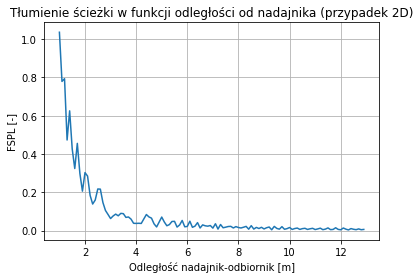

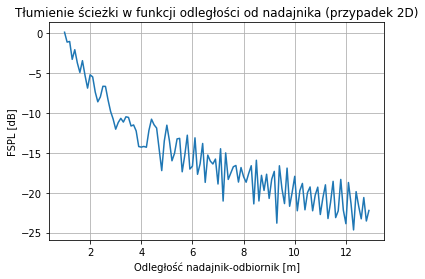

In [47]:
#2D
theta = 0 #kat padania wiazki
a1 = 1
a2 = (n*math.cos(theta)-math.sqrt(n-math.sin(theta)**2))/(n*math.cos(theta)+math.sqrt(n-math.sin(theta)**2))
i=0
RPL_linear =  deepcopy(dTemp)
for d in dTemp:
    d2 = 2*a-d #sciezka 2 - odbicie od sciany
    d3 = math.sqrt(d**2 + b**2)
    sintheta = d/d3
    costheta = b/d3
    a3 = (n*costheta-math.sqrt(n-sintheta**2))/(n*costheta+math.sqrt(n-sintheta**2))
    fi1 = -2*math.pi*f*d/c
    fi2 = -2*math.pi*f*d2/c
    fi3 = -2*math.pi*f*d3/c
    RPL_linear[i] = abs(a1/d *math.e**(fi1*1j) + a2/d2 *math.e**(fi2*1j) + 2*a3/d3 *math.e**(fi3*1j))**2
    i  += 1
    
RPL_log = 10 * np.log10(RPL_linear)
    
fig = plt.figure(5)
plt.plot(dTemp, RPL_linear)
plt.title('Tłumienie ścieżki w funkcji odległości od nadajnika (przypadek 2D)')
plt.xlabel('Odległość nadajnik-odbiornik [m]')
plt.ylabel('FSPL [-]')
plt.grid()
plt.show()

fig = plt.figure(6)
plt.plot(dTemp, RPL_log)
plt.title('Tłumienie ścieżki w funkcji odległości od nadajnika (przypadek 2D)')
plt.xlabel('Odległość nadajnik-odbiornik [m]')
plt.ylabel('FSPL [dB]')
plt.grid()
plt.show()

### 3.3. Modyfikacja rozmiarów pokoju


**Rozbudowa pokoju o "wnękę" o rozmiarach a x b**

Nasz pokój został poddany w rozpatrywanym przypadku rozbudowie o część o szerokości a i długości b. Poniżej znajdziemy poglądowy rysunek rozbudowy.

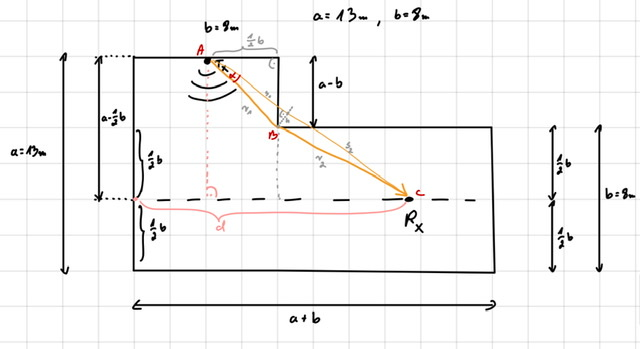


Na podstawie rysunku wyznaczone zostały następujące zależności:
$$
\begin{aligned}
& S_1+S_2=\sqrt{\left(a-\frac{1}{2} b\right)^2+(d-\frac{b}{2})^2} \\
& r_1=\text { const. }=\sqrt{\left(\frac{1}{2} b^2\right)+(a-b)^2} \\
& r_2=\sqrt{\left(\frac{1}{2} b\right)^2+(d-b)^2}
\end{aligned}
$$

Z twierdzenia cosinusów dla $\triangle A B C$ :
$$
\begin{aligned}
& r_2^2=r_1^2+\left(s_1+s_2\right)^2-2 r_1\left(s_1+s_2\right) \cdot \cos \alpha \\
& r_2^2-r_1^2-\left(s_1+s_2\right)^2=-2 r_1\left(s_1+s_2\right) \cdot \cos \alpha \\
& \alpha=\arccos(\frac{r_2^2-r_1^2-\left(s_1+s_2\right)^2}{-2 r_1\left(s_1+s_2\right)}) \\
& h=r_1 \cdot \frac{n}{r_1}=r_1 \cdot \sin \alpha
\end{aligned}
$$


**1D - Wyznaczenie straty dyfrakcji w osi dobudowanej części**

Obliczone wcześniej wartości umożliwiają wyznaczenie $v$:
$$
v=h \sqrt{\frac{2}{\lambda} \frac{s_1+s_2}{r_1 r_2}}
$$

Wykorzystując wyznaczoną wartość możliwe jest obliczenie straty dyfrakcji $c$:
$$
C=6,9+20 \log \left(\sqrt{(v-0,1)^2+1}+v-0,1\right)
$$

Strata dyfrakcji pojawi się dopiero w momencie gdy odbiornik i nadajnik przestaną siebie widzieć. Odległość graniczna dla tej sytuacji nastąpi po przekroczeniu odległości równej a, co wyznaczono na poniższym rysunku pomocniczym.

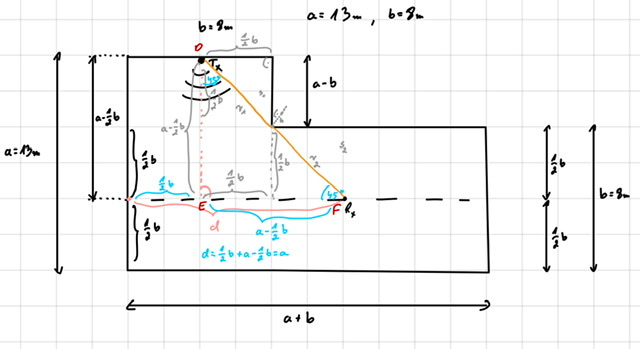

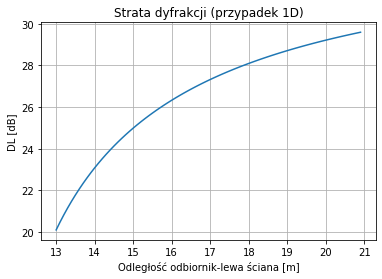

In [48]:
step = 0.1
d_horizontal = a + b
d = a
dHorTemp = np.arange(d, d_horizontal, step)
DiffLoss_linear = deepcopy(dHorTemp)
r1 = math.sqrt((b/2)**2+(a-b)**2)
i = 0
for d in dHorTemp:
    S_sum = math.sqrt((a-b/2)**2 + (d-b/2)**2)
    r2 = math.sqrt((b/2)**2+(d-b)**2)
    alpha = np.arccos((r2**2 - r1**2 - S_sum**2)/(-2*r1*S_sum))
    h = r1 * np.sin(alpha)
    v = h * math.sqrt(2/lbd*S_sum/(r1*r2))
    DiffLoss_linear[i] =  6.9 + 20 * math.log10(math.sqrt((v - 0.1)**2+1)+v -0.1)
    i += 1
    
fig = plt.figure(7)
plt.plot(dHorTemp, DiffLoss_linear)
plt.title('Strata dyfrakcji (przypadek 1D)')
plt.xlabel('Odległość odbiornik-lewa ściana [m]')
plt.ylabel('DL [dB]')
plt.grid()
plt.show()

Wraz ze wzrostem odległości odbiornika od lewej ściany obserwuje się wzrost straty dyfrakcji.

**2D  - wyznaczenie wartości straty dyfrakcji w całej dobudowanej części**

Za punkt odniesienia dobudowanej części pokoju przyjęto lewy górny róg i określono współrzędnymi pomocniczymi x oraz y. Dla lewego górnego rogu pokoju obie współrzędne są zerowe.

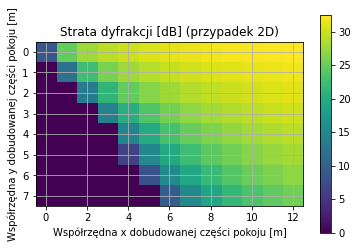

In [49]:
step =1
dX = np.arange(0.2, a, step)
dY = np.arange(0.2,  b, step)
DiffLoss = np.zeros((len(dY),len(dX)), dtype=float);
r1 = math.sqrt((b/2)**2+(a-b)**2)
i = 0
j  = 0
t1 = abs((a-b)/(b/2))
for i, y in enumerate(dY):
    for j, x in enumerate(dX):
        S_sum = math.sqrt((a-b + y)**2 + (b/2 + x)**2)
        r2 = math.sqrt(y**2+x**2)
        t2 = abs(y/x)
        if t2 >= t1:
            DiffLoss[i,j]=0
        else:
            alpha = np.arccos((r2**2 - r1**2 - S_sum**2)/(-2*r1*S_sum))
            h = r1 * np.sin(alpha)
            v = h * math.sqrt(2/lbd*S_sum/(r1*r2))

            DiffLoss[i,j] =  6.9 + 20 * math.log10(math.sqrt((v - 0.1)**2+1)+v -0.1)
            
#y, x= np.meshgrid(dY, dX)
#fir, ax = plt.subplots()
#c = ax.pcolormesh(x, y, DiffLoss)
fig = plt.figure(8)
plt.imshow(DiffLoss)
plt.title('Strata dyfrakcji [dB] (przypadek 2D)')
plt.xlabel('Współrzędna x dobudowanej części pokoju [m]')
plt.ylabel('Współrzędna y dobudowanej części pokoju [m]')
plt.grid()
plt.colorbar()

plt.show()

Analizując powyższy wykres zaobserwować można, że brak straty dyfrakcji, gdy nadajnik i odbiornik bezpośrednio się "widzą". Strata nasila się w miarę oddalania od nadajnika.

**Rozbudowa pokoju w układ symetrycznej podkowy**

Pokój rozbudowano tak, aby stał siię symetryczną podkową. Wykonano analizę wartości tłumienia ścieżki dla trzech wariantów radiowych.


**Sygnał przenika przez ściany i dociera do odbiornika**

Aby obliczyć tłumienie ścieżki w tym przypadku posłużono się modelem propagacyjnym *Multi-Wall* będącym połączeniem modelu *One-Slope* oraz modelu *Motleya-Keenana*. Model ten opisuje się następującym wzorem:

$$
L=L_0+10 \gamma \log (d)+\sum_{i=1}^L k_{w i} \cdot L_{w i}+\sum_{j=1}^J k_{f j} \cdot L_{f j}
$$
gdzie:
$L-$ tłumienie propagacyjne pomiędzy antenami [dB]
$L_0$ - tłumienie odniesienia w odległości $1 \mathrm{~m}$ [dB]
$\gamma$ - indeks odległościowego zaniku mocy($\gamma$=2)
$d$ - odległość pomiędzy antenami [m]
$k_{w i}$ - liczba ścian kategorii $i$
$L_{w i}-$ tłumienie ściany kategorii $i$
$k_{f j}$ - liczba stropów kategorii $j$
$L_{f j}-$ tłumienie stropu kategorii $j$

W naszym przypadku nie rozpatrujemy stropu, więc składnik ten zostanie pominięty. Tłumienie ściany ceglanej przyjęto jako 7 dB. Tłumienie odniesienia przyjęto jako -46 dB w oparciu o wcześniejsze wyniki FSPL.

Odległość między nadajnikiem i odbiornikieem została wyznaczona zgodnie z poniższym rysunkiem poglądowym:

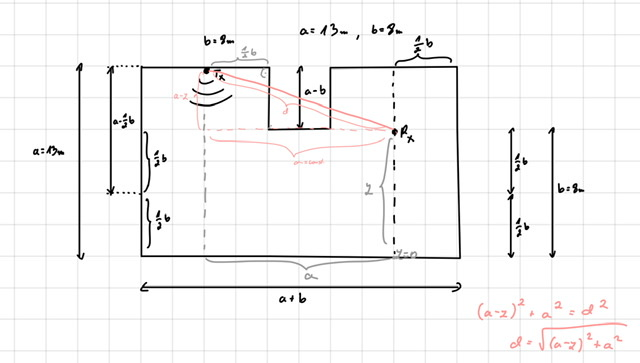

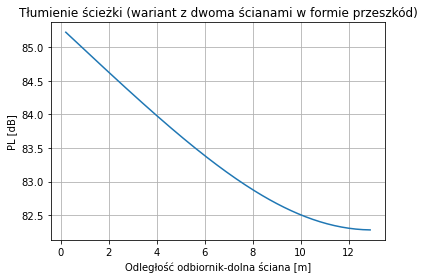

In [52]:
step = 0.1
zTemp = np.arange(0.2, a, step)
L = deepcopy(zTemp)
L_wi = 7
k_wi =  2 #2 ściany
i = 0
L0 = 46
gamma = 2
for i, z in enumerate(zTemp):
    d = math.sqrt((a-z)**2 + a**2)
    L[i]  =  L0 +  10 * gamma * math.log10(d) + k_wi * L_wi

fig = plt.figure(9)
plt.plot(zTemp, L)
plt.title('Tłumienie ścieżki (wariant z dwoma ścianami w formie przeszkód)')
plt.xlabel('Odległość odbiornik-dolna ściana [m]')
plt.ylabel('PL [dB]')
plt.grid()
plt.show()

W przypadku wprowadzenia przeszkód na drodze propagacji ogromny wpływ na wartość tłumienia stanowi odległość nadajnik-odbiornik. Ponadto obserwuje się większe wartości tłumienia niż dla przypadków propagacji z odbiciamia, lub propagacji w wolnej przestrzeni.

**Sygnał ulega podwójnej dyfrakcji modelowanej metodą Berga**

Tłumienie ścieżki modelowane metodą Berga obliczyć można ze wzoru:

$$
L_{d B}^{(n)}=20 \cdot \log \left(\frac{4 \cdot \pi \cdot d_n}{\lambda}\right)
$$
gdzie $n=j_{\max }$ - liczba punktów załamania ścieżki powiększona o 2, $d_n$ - dystans iluzoryczny

Dystans iluzoryczny opisują zależności:

$$
\left\{\begin{array}{l}
k_j=k_{j-1}+d_{j-1} \cdot q_{j-1} \\
d_j=k_j \cdot s_{j-1}+d_{j-1}
\end{array}\right.
$$
z wartościami inicjalizacyjnymi:
$$
k_0=1 \text { oraz } d_0=0
$$

Szczegóły metody Berga opisane są dokładnie w *A Recursive Method For Street Microcell Path Loss Calculations* J. Berg.

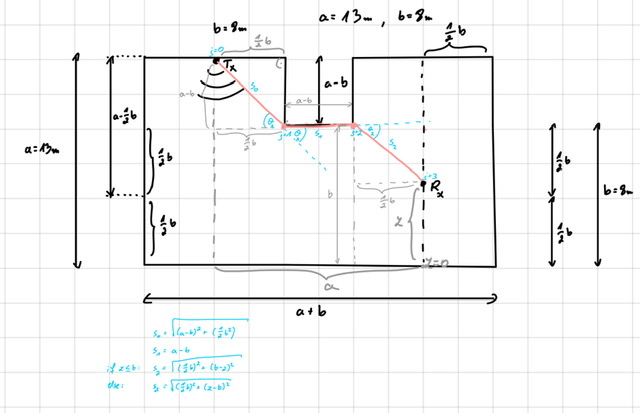

Powyższe dane posłużyły do wyznaczenia wyjściowych równań:

$$
\begin{aligned}
& v=3,5 \\
& q \lambda=0,031 \\
& q_{90}=\sqrt{\frac{q\lambda}{\lambda}} \\
& \theta_1=\arcsin \left(\frac{a-b}{s_0}\right) \\
& \theta_2=0 \\
& \theta_3=\arcsin \left(\frac{b}{2s_2}\right) \\
& q_j=q_{90}\left(\frac{\theta_j\left(\operatorname{deg}\right)}{90\left(\operatorname{deg}\right)}\right)^v
\end{aligned}
$$

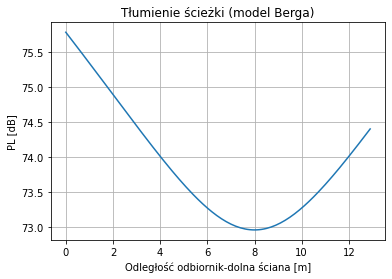

In [54]:
step = 0.1
LnTemp  = np.arange(0, a, step)
Ln = deepcopy(LnTemp)
s0 = math.sqrt((a-b)**2+(b/2)**2)
s1 = a - b
v  = 3.5
k0 = 1
d0 = 0
qlambda = 0.031
q90 = math.sqrt(qlambda/lbd)
for i, z in enumerate(LnTemp):
    if z >= b:
        s2 = math.sqrt((b/2)**2 + (b-z)**2)
    else:
        s2 = math.sqrt((b/2)**2 + (z-b)**2)
    theta1 = np.arcsin((a-b)/s0)
    theta1 = math.degrees(theta1)
    q1  =  q90 * (theta1/90)**v
    q2  =  0 #bo theta2=0
    theta3 = np.arccos(b/(2*s2))
    theta3 = math.degrees(theta3)
    q3  =  q90 * (theta3/90)**v
    #dla j=1
    k1 = 1
    d1 = k1 * s0 +  d0
    #dla j=2
    k2 = k1 + d1*q1
    d2 = k2 * s1 + d1
    #dla j=3
    k3 = k2 + d2*q2
    d3 = k3*s2 + d2
    Ln[i] = 20*math.log10(4*math.pi*d3/lbd)
 
fig = plt.figure(10)
plt.plot(LnTemp, Ln)
plt.title('Tłumienie ścieżki (model Berga)')
plt.xlabel('Odległość odbiornik-dolna ściana [m]')
plt.ylabel('PL [dB]')
plt.grid()
plt.show()
    

Analizując nasz przypadek stwierdzić można, że w modelu Berga czynnikiem wpływającym na tłumienie ścieżki jest przede wszystkim bezpośrednia odległość między antenami.

**Sygnał ulega kilkukrotnym odbiciom wynikającym z zasad geometrii**

Dla sygnału wyznaczono przykładową ścieżkę zawierającą co najmniej dwa odbicia. W obliczeniach wziętopoduwagę, że kąt odbicia jest równy kątowi padania.

Rysunek poglądowy oraz wynikające z niego przekształcenia przedstawiają się następująco:

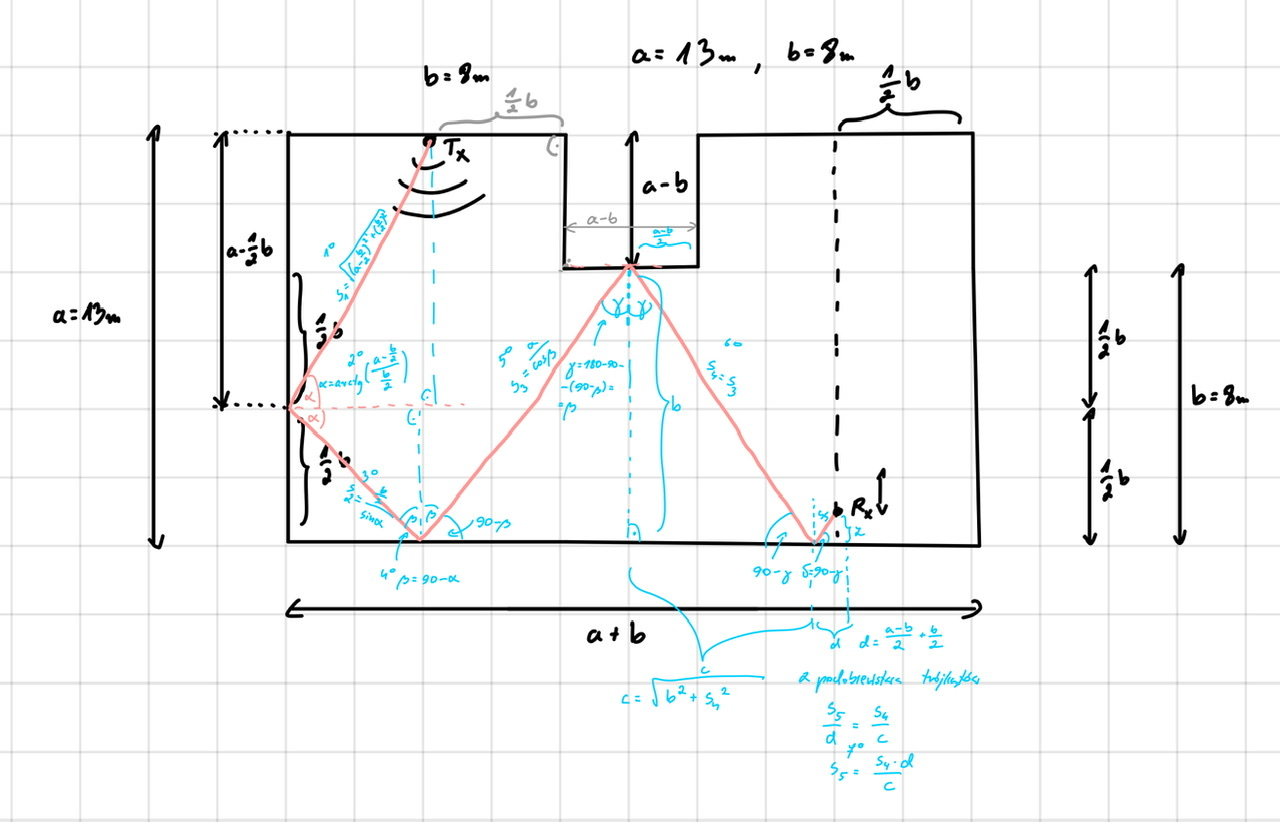

Obliczając względny spadek mocy sygnału skorzystamy z następującego wzoru:

$$
\frac{P_R}{P_0}=\left|\sum_{i=1}^L \frac{a_i}{d_i} e^{j \varphi_i}\right|^2
$$

$P_0-$ moc nadawana,
$P_R-$ moc odebrana,
$i$ - indeks ścieżki,
$a_i$ - współczynnik odbicia i-tej drogi sygnału,
$d_i$-dhugość i-tej drogi sygnału,
$\varphi_i-$ faza i-tej drogi sygnału $\left(\varphi_i=-2 \pi f_c \frac{d_i}{c}\right)_2$,
$L -$ liczba ścieżek.


Aby obliczyć współczynnik odbicia skorzystano ze wzoru:

$$
R_{e T M}=\frac{\eta \cos \theta-\sqrt{\eta-\sin ^2 \theta}}{\eta \cos \theta+\sqrt{\eta-\sin ^2 \theta}}
$$

$\eta$-względna przenikalność elektryczna ( $\eta_{\text {brick }}=3,91$ (źródło: ITU - R P. 2040-2, tab. 3)),
$\theta$ - kąt padania ścieżki.


In [12]:
alpha_deg = np.arctan(math.degrees((a-b/2)/(b/2)))
betha_deg = 90 - alpha_deg
gamma_deg = betha_deg
delta_deg = 90 - gamma_deg

n = 3.91

s1 = math.sqrt((a-b/2)**2 + (b/2)**2)
s2 = (b/2)/np.sin(alpha_deg)
s3 = a/np.cos(betha_deg)
s4 = s3
d = (a-b)/2 + b/2
s5 = s4 * d/c

di = s1  + s2 + s3 + s4 + s5

listA = [alpha_deg, betha_deg, gamma_deg, delta_deg]
ai = np.zeros(len(listA))

for i, theta in enumerate(listA):
    ai[i] = (n*math.cos(theta)-math.sqrt(n-math.sin(theta)**2))/(n*math.cos(theta)+math.sqrt(n-math.sin(theta)**2))

PL = abs((ai[0] * ai[1] * ai[2] * ai[2])/di * math.e ** (1j * (-2 * math.pi * d * di/c)))
PL = 10* np.log10(PL)
print('Tłumienie ścieżki dla naszego przypadku wyniosło ' + str(PL) + ' dB')


Tłumienie ścieżki dla naszego przypadku wyniosło -32.70742333040342 dB


**Rozbudowanie programu według własnego pomysłu**

Założono że ściany pokoju zostały wyłożone folią aluminiową. Dla tego przypadku zbadano tłumienie wybranej wcześniej pojedynczej ścieżki przy wystąpieniu kilkukrotnego odbicia od ścian. Analizę zrealizowano na przykładzie ścieżki, z którego skorzystano powyżej, we wcześniejszym punkcie tego raportu.

Za stałą dielektryczną folii aluminiowej przyjęto wartość 2.

In [13]:
alpha_deg = np.arctan(math.degrees((a-b/2)/(b/2)))
betha_deg = 90 - alpha_deg
gamma_deg = betha_deg
delta_deg = 90 - gamma_deg

n = 10.8

s1 = math.sqrt((a-b/2)**2 + (b/2)**2)
s2 = (b/2)/np.sin(alpha_deg)
s3 = a/np.cos(betha_deg)
s4 = s3
d = (a-b)/2 + b/2
s5 = s4 * d/c

di = s1  + s2 + s3 + s4 + s5

listA = [alpha_deg, betha_deg, gamma_deg, delta_deg]
ai = np.zeros(len(listA))

for i, theta in enumerate(listA):
    ai[i] = (n*math.cos(theta)-math.sqrt(n-math.sin(theta)**2))/(n*math.cos(theta)+math.sqrt(n-math.sin(theta)**2))

PL = abs((ai[0] * ai[1] * ai[2] * ai[2])/di * math.e ** (1j * (-2 * math.pi * d * di/c)))
PL = 10* np.log10(PL)
print('Tłumienie ścieżki dla naszego przypadku wyniosło ' + str(PL) + ' dB')


Tłumienie ścieżki dla naszego przypadku wyniosło -25.752106615594133 dB


W przypadku obudowania ścian folią aluminiową obserwuje się zmniejszenie tłumienia fali, co jest zgodne z oczekiwaniami.

### 3.4. Układ budynków siatki Manhattan

Za pomocą rozkładu jednostajnego wylosowano położenie nadajnika, po czym wyznaczono wartość tłumienia ścieżki.

**2D - stała wysokość położenia odbiornika - według wybranego modelu propagacyjngo O2O**

Do analizy wykorzystano układ Manhattan.

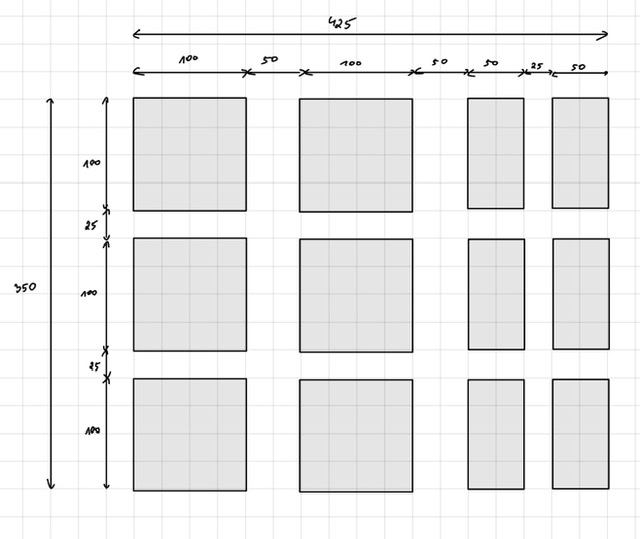

Modelowanie tłumienia ścieżki zostało zrealizowane z użyciem modelu propagacyjnego O2O mmMagic.

$$
\begin{gathered}
L O S \\
P L=19.2 \log _{10} d+32.9+20.8 \log _{10} f_c \\
N L O S \\
P L=45 \log _{10} d+31+20 \log _{10} f_c
\end{gathered}
$$


Współrzędne wylosowanego nadajnika to: x: 4, y: 144


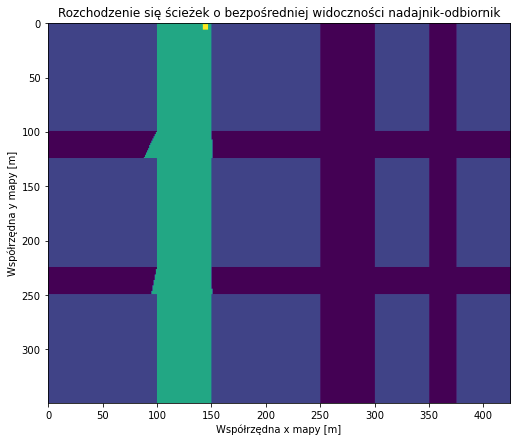

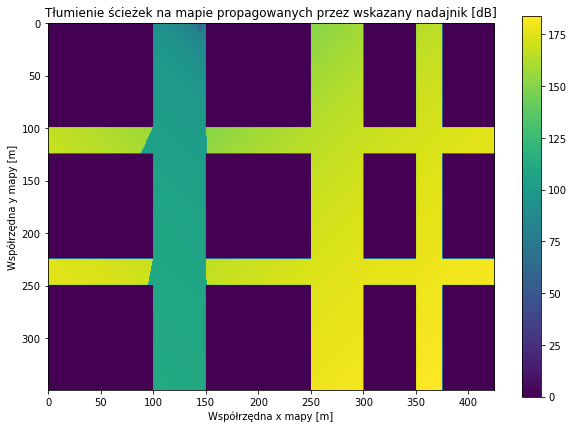

In [17]:
Xtx = 275
Ytz = 75
import numpy as np 
from matplotlib import pyplot as plt
import math

def ray_colision(Map, y0, x0, y1, x1):
    dy, dx = y1-y0, x1-x0
    if dx==0 and dy==0: return
    if abs(dx) > abs(dy):
        a = dy/dx
        b = y0 - a*x0
        for x in range(min(x0,x1), max(x0,x1)):
            y = round(a*x+b)
            if Map[y,x]: return True
    else:
        c = dx/dy
        d = x0 - c*y0
        for y in range(min(y0,y1), max(y0,y1)):
            x = round(c*y+d)
            if Map[y,x]: return True
    return False
            
Map = np.zeros((350, 425), dtype=float)
Map[0:100,0:100] = Map[125:225,0:100] = Map[250:350,0:100] = 1
Map[0:100,150:250] = Map[125:225,150:250] = Map[250:350,150:250] = 1
Map[0:100,300:350] = Map[125:225,300:350] = Map[250:350,300:350] = 1
Map[0:100,375:425] = Map[125:225,375:425] = Map[250:350,375:425] = 1
#NotMap = np.logical_not(Map)

y_, x_ = np.nonzero(np.logical_not(Map))
i = np.random.choice(len(y_), 1)
tx_y, tx_x = int(y_[i]), int(x_[i])
print('Współrzędne wylosowanego nadajnika to: x: ' + str(tx_y) + ', y: ' + str(tx_x))
Preview = Map.copy()
Result = np.zeros(Map.shape)

f = 27

los_constant = 32.9 + 20.8*math.log10(f)
nlos_constant = 31 + 20*math.log10(f)

# po wszystkich punktach ulic
for rx_y, rx_x in zip(y_, x_):
    dy, dx = abs(rx_y - tx_y), abs(rx_x - tx_x)
    d = dy + dx
    if d <= 0: continue
    if not ray_colision(Map, tx_y, tx_x, rx_y, rx_x):
        Preview[rx_y, rx_x] = 3
        PL = 19.2*math.log10(d) + los_constant
    else:
        PL = 45*math.log10(d) + nlos_constant
    Result[rx_y, rx_x] = PL

Preview[tx_y-2:tx_y+3, tx_x-2:tx_x+3] = 5
plt.figure(9, figsize=(10,7))
plt.title('Rozchodzenie się ścieżek o bezpośredniej widoczności nadajnik-odbiornik')
plt.xlabel('Współrzędna x mapy [m]')
plt.ylabel('Współrzędna y mapy [m]')
plt.imshow(Preview)

plt.figure(10, figsize=(10,7))
plt.title('Tłumienie ścieżek na mapie propagowanych przez wskazany nadajnik [dB]')
plt.xlabel('Współrzędna x mapy [m]')
plt.ylabel('Współrzędna y mapy [m]')
plt.imshow(Result)
plt.colorbar()
plt.show()

Wyznaczone ścieżki LOS są silnie skorelowane z wylosowanym położeniem nadajnika. Znacznie większe wartości tłumienia obserwuje się dla przypadku NLOS. Zaobserwować można również niewielki wpływ bezpośredniej odległości nadajnik-odbiornik na tłumienie sygnału.